<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-5-hough-lanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### https://www.learnopencv.com/hough-transform-with-opencv-c-python/

In [2]:
from google.colab.patches import cv2_imshow

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19-YI3DtH84A-JiDitR-se4-_sQZHYfbE' -O lanes1.jpg


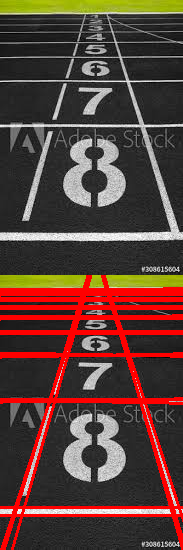

In [4]:
#-*- coding:utf-8-*-
import cv2
import numpy as np

img = cv2.imread('lanes1.jpg', cv2.IMREAD_COLOR)
img_original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

lines = cv2.HoughLines(edges,1,np.pi/180,100)

# dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
# lines: A vector that will store the parameters (r,θ) of the detected lines
# rho : The resolution of the parameter r in pixels. We use 1 pixel.
# theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
# threshold: The minimum number of intersections to "*detect*" a line
# srn and stn: Default parameters to zero. Check OpenCV reference for more info.

for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0+1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 -1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

res = np.vstack((img_original,img))
cv2_imshow(res)
# cv2.imshow('img',res)
# cv2.waitKey(0)
# cv2.destroyAllWindows()